In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist

(images_train, targets_train), (images_test, targets_test) = tf.keras.datasets.fashion_mnist.load_data()

targets_names = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", "Chemise", "Sneaker", "Sac", "Bottes"]

images_train = images_train.reshape(-1,28,28,1)
images_test = images_test.reshape(-1,28,28,1)

images_train = images_train.astype('float')/255
images_test = images_test.astype('float')/255

In [10]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [12]:
history = model.fit(images_train, targets_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 115s 74ms/step - loss: 0.4027 - accuracy: 0.8544 - val_loss: 0.2935 - val_accuracy: 0.8939
Epoch 2/15
1500/1500 [==============================] - 105s 70ms/step - loss: 0.2821 - accuracy: 0.8951 - val_loss: 0.2604 - val_accuracy: 0.9042
Epoch 3/15
1500/1500 [==============================] - 101s 67ms/step - loss: 0.2386 - accuracy: 0.9113 - val_loss: 0.2524 - val_accuracy: 0.9088
Epoch 4/15
1500/1500 [==============================] - 100s 67ms/step - loss: 0.2084 - accuracy: 0.9218 - val_loss: 0.2539 - val_accuracy: 0.9085
Epoch 5/15
1500/1500 [==============================] - 102s 68ms/step - loss: 0.1828 - accuracy: 0.9309 - val_loss: 0.2356 - val_accuracy: 0.9164
Epoch 6/15
1500/1500 [==============================] - 105s 70ms/step - loss: 0.1602 - accuracy: 0.9398 - val_loss: 0.2371 - val_accuracy: 0.9177
Epoch 7/15
1500/1500 [==============================] - 105s 70ms/step - loss: 0.1394 - accuracy: 0.9459 - val_loss: 0

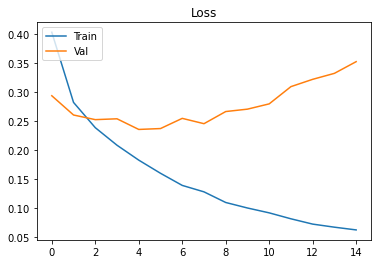

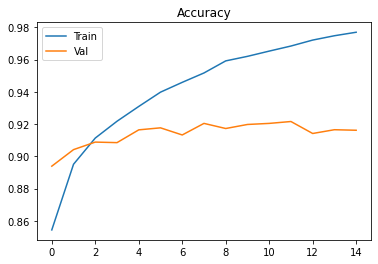

In [13]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [14]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.3853 - accuracy: 0.9129
Test Loss 0.38534092903137207
Test Accuracy 0.9128999710083008
